In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time


options = webdriver.ChromeOptions()
user_data = r"C:\Users\pradu\AppData\Local\Google\Chrome\User Data Scraper"
options.add_argument(f"--user-data-dir={user_data}")
options.add_argument("--profile-directory=Default")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)


driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)
wait = WebDriverWait(driver, 20)

driver.get("https://unstop.com/jobs")
wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))

print("Page Loaded")


jobs_data = []
last_clicked_page = 0


while True:
    time.sleep(2)

    
    job_cards = driver.find_elements(
        By.CSS_SELECTOR, "a.item.position-relative"
    )

    print(f"Found {len(job_cards)} jobs on page")

    for card in job_cards:
    
        try:
            title = card.find_element(By.TAG_NAME, "h3").text.strip()
        except:
            title = None

        
        try:
            company = card.find_element(
                By.CSS_SELECTOR, "p.single-wrap"
            ).text.strip()
        except:
            try:
                company = card.find_element(
                    By.CSS_SELECTOR, "span.single-wrap"
                ).text.strip()
            except:
                company = None

        
        try:
            experience = card.find_element(
                By.XPATH, ".//span[contains(text(),'Year')]"
            ).text.strip()
        except:
            experience = None

        
        try:
            salary = card.find_element(
                By.CSS_SELECTOR, "span.title.align-center.gap-4"
            ).text.strip()
        except:
            salary = None

    
        try:
            location = card.find_element(
                By.CSS_SELECTOR, "span.single-wrap.job_location"
            ).text.strip()
        except:
            location = None

        
        job_url = card.get_attribute("href")

        if title:
            jobs_data.append({
                "Job Title": title,
                "Company": company,
                "Experience": experience,
                "Salary": salary,
                "Location": location,
                "Job URL": job_url
            })

    print(f"Total jobs collected: {len(jobs_data)}")

    
    tabs = driver.find_elements(By.CSS_SELECTOR, "span.number.waves-effect")
    next_tab = None

    for tab in tabs:
        if tab.text.isdigit() and int(tab.text) == last_clicked_page + 1:
            next_tab = tab
            break

    if next_tab:
        last_clicked_page += 1
        print(f"Clicking page {last_clicked_page}")

        driver.execute_script(
            "arguments[0].scrollIntoView({block:'center'});", next_tab
        )
        driver.execute_script("arguments[0].click();", next_tab)

        wait.until(EC.staleness_of(job_cards[0]))
    else:
        print("No more pages")
        break


df = pd.DataFrame(jobs_data)
df.to_csv("unstop_jobs_fulle.csv", index=False, encoding="utf-8-sig")

print(" Scraping completed & saved to unstop_jobs_full.csv")

driver.quit()


Page Loaded
Found 21 jobs on page
Total jobs collected: 18
Clicking page 1
Found 21 jobs on page
Total jobs collected: 36
Clicking page 2
Found 22 jobs on page
Total jobs collected: 54
Clicking page 3
Found 21 jobs on page
Total jobs collected: 72
Clicking page 4
Found 22 jobs on page
Total jobs collected: 90
Clicking page 5
Found 22 jobs on page
Total jobs collected: 108
Clicking page 6
Found 21 jobs on page
Total jobs collected: 126
Clicking page 7
Found 22 jobs on page
Total jobs collected: 144
Clicking page 8
Found 21 jobs on page
Total jobs collected: 162
Clicking page 9
Found 22 jobs on page
Total jobs collected: 180
Clicking page 10
Found 22 jobs on page
Total jobs collected: 198
Clicking page 11
Found 21 jobs on page
Total jobs collected: 216
Clicking page 12
Found 22 jobs on page
Total jobs collected: 234
Clicking page 13
Found 0 jobs on page
Total jobs collected: 234
No more pages
 Scraping completed & saved to unstop_jobs_full.csv


In [15]:
df=pd.read_csv("unstop_jobs_fulle.csv")
df.sample(100)

,Job Title,Company,Experience,Salary,Location,Job URL
88,Back Office Operations Manager,Presume Overseas Education (OPC)Pvt. Ltd.,NaN,NaN,In Office | Indore,https://unstop.com/jobs/back-office-operations...
493,Key Account Manager,Code Vyasa,NaN,3 L -\n10 LPA,In Office,https://unstop.com/jobs/key-account-manager-co...
390,Business Development Executive,Staffigo Technical Services,NaN,2.4 L -\n5 LPA,In Office | Chennai,https://unstop.com/jobs/business-development-e...
378,Shift Manager,(Subway) Culinary Brands India Private Limited,NaN,25 K/Month,In Office | Visakhapatnam,https://unstop.com/jobs/shift-manager-subway-c...
156,SEO Executive,Biz Emporia Consultancy Pvt. Ltd.,NaN,2.4 L -\n3.5 LPA,In Office | Noida,https://unstop.com/jobs/seo-executive-biz-empo...
...,...,...,...,...,...,...
275,Human Resource Coordinator,Gebbs healthcare solutions,NaN,NaN,"In Office | Navi Mumbai, Mumbai",https://unstop.com/jobs/human-resource-coordin...
25,Video Editor & Content Specialist,Laxmaya Technologies Pvt. Ltd.,NaN,NaN,In Office | Jaipur,https://unstop.com/jobs/video-editor-content-s...
402,NodeJS Developer,Mantra Labs Global Private Limited,NaN,NaN,In Office | Gurgaon,https://unstop.com/jobs/nodejs-developer-mantr...
248,Desktop Engineer,Shah Kapadia & Associates,NaN,NaN,In Office | Sion Mumbai,https://unstop.com/jobs/desktop-engineer-shah-...


In [16]:
df.drop(columns=['Experience'])


,Job Title,Company,Salary,Location,Job URL
0,Talent Acquisition Executive,Aazron Global Solutions,3 L -\n4.2 LPA,In Office | Bengaluru,https://unstop.com/jobs/talent-acquisition-exe...
1,Junior Full Stack Developer,CIEL HR Services,4.8 L -\n5 LPA,In Office | Kolkata,https://unstop.com/jobs/junior-full-stack-deve...
2,AI Engineer – Agentic Systems,Vikara AI,25 L -\n30 LPA,Remote,https://unstop.com/jobs/ai-engineer-agentic-sy...
3,Back Office Executive,Eve11 Consultants,2.4 L -\n3 LPA,In Office | Indore,https://unstop.com/jobs/back-office-executive-...
4,Marketing Manager,Suparsh Recruitment,NaN,In Office | Barpeta,https://unstop.com/jobs/marketing-manager-supa...
...,...,...,...,...,...
495,Canva Designer,Webfuture.in,2.5 L -\n5 LPA,Remote,https://unstop.com/jobs/canva-designer-webfutu...
496,Business Development Associate,Counseling Shortcuts,2.4 L -\n6.4 LPA,Remote,https://unstop.com/jobs/business-development-a...
497,Travel & Offline Marketing Associate,GoHappy Club,2.5 L -\n4 LPA,Remote,https://unstop.com/jobs/travel-offline-marketi...
498,Sales Executive,VA Spices and Nuts,NaN,In Office,https://unstop.com/p/telesales-1197827


<Axes: ylabel='count'>

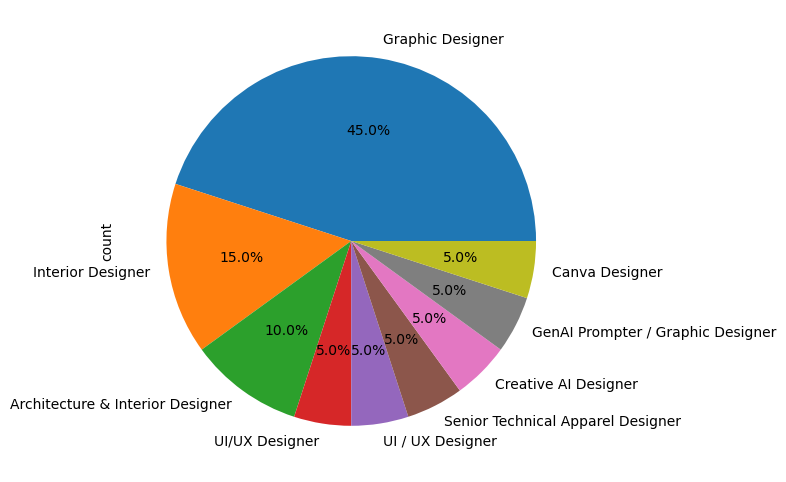

In [27]:


keywords = ['graphic', 'canva','ui/ux designer','designer']

df['designer'] = df['Job Title'].where(
    df['Job Title'].str.contains('|'.join(keywords), case=False, na=False),
    'no'
)




designer_only = df[df['designer'] != 'no']

designer_only['designer'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6)

)

In [20]:
df['sales'] = df['Job Title'].where(
    df['Job Title'].str.contains('sales', case=False, na=False),
    'no'
)
sales_only = df[df['sales'] != 'no']

sales_only['sales'].value_counts()





sales
Field Sales Executive                          13
Sales Executive                                 7
Direct Sales Executive                          6
Inside Sales Executive                          5
Sales Manager                                   4
IT Sales Executive                              3
Area Sales Manager                              3
Telesales Associate                             3
Sales Operations / Enablement Associate         2
Sales Engineer                                  2
Retail Sales Associate                          2
Regional Sales Manager                          2
Sales Consultant                                2
Direct Sales Agent                              2
Pre Sales Engineer                              2
Branch Sales Executive                          2
Sales Development Representative                2
Area Sales Manager (B2B)                        2
Inside Sales Internship                         1
Estate Sales Manager                        

In [57]:
df['marketing'] = df['Job Title'].where(
    df['Job Title'].str.contains('marketing', case=False, na=False),
    'no'
)
marketing_only=df[df['marketing']!='no']
marketing_only['marketing'].value_counts()


marketing
Digital Marketing Executive                       7
Head - Digital Marketing                          3
Marketing Executive                               3
Marketing Manager                                 2
Social Media Marketing Associate                  2
Digital Marketing                                 1
Performance Marketing Manager                     1
Social Media Marketing                            1
Brand Marketing Manager                           1
Tele Marketing Associate                          1
Content Marketing Internship                      1
Sales & Marketing Executive                       1
Digital Marketing & Video Editing Executive       1
Outbound Marketing Manager (Demand Generation)    1
Marketing Internship                              1
Performance Marketing Executive                   1
Sales and Marketing Executive                     1
Digital Marketing Associate                       1
Account Manager (Digital Marketing)               1
AI

In [62]:
df['buisness'] = df['Job Title'].where(
    df['Job Title'].str.contains('business', case=False, na=False),
    'no'
)
buisness_only=df[df['buisness']!='no']
buisness_only['buisness'].value_counts()



buisness
Business Development Executive                     29
Business Development Executive (BDE)                9
Business Development Associate                      5
Business Development Manager                        3
Business Development Manager – IT & AI Services     2
Business Development Manager (BDM)                  2
Business Development and Marketing Internship       1
Business Development Specialist                     1
Junior Business Development Associate               1
Senior Business Development Executive               1
Business Operations Team Lead                       1
Business Development Executive- I                   1
FMCG Sales Business Development Associate           1
Business Development Team Lead                      1
Business & strategy executive                       1
Business Support Executive                          1
Name: count, dtype: int64

In [60]:
df['analyst'] = df['Job Title'].where(
    df['Job Title'].str.contains('analyst', case=False, na=False),
    'no'
)
Analyst_only=df[df['analyst']!='no']
Analyst_only['analyst'].value_counts()



analyst
Data Analyst                 3
Senior Product Analyst       1
Product Analyst              1
Associate Data Analyst       1
Demand Generation Analyst    1
Data Entry Analyst           1
IT Analyst                   1
Name: count, dtype: int64

<Axes: ylabel='count'>

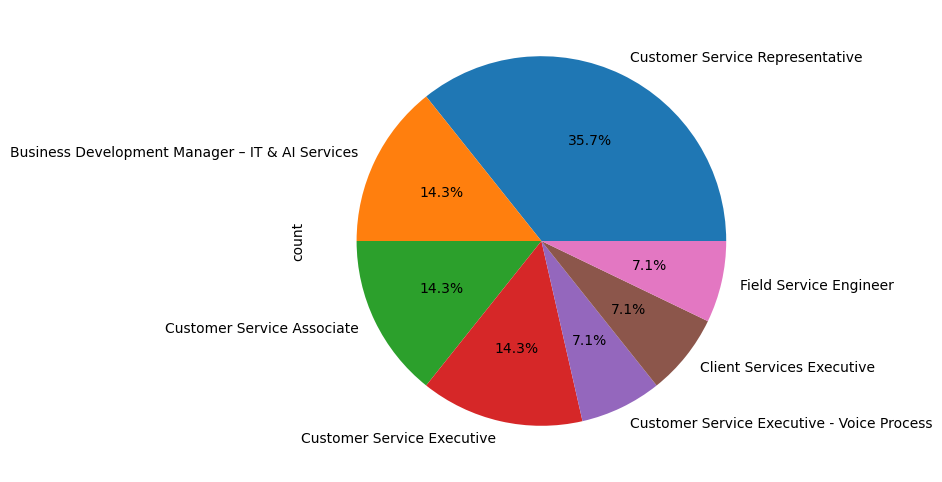

In [43]:
df['service'] = df['Job Title'].where(
    df['Job Title'].str.contains('service', case=False, na=False),
    'no'
)
service_only=df[df['service']!='no']
service_only['service'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)


)

software
Full Stack Developer                   5
Software Development Engineer          3
Junior Full Stack Developer            2
UI/UX Designer                         1
Python Developer (Cloud exp)           1
Frontend Developer                     1
Cloud Engineer                         1
Software Quality Assurance Engineer    1
IT Engineer - Capital Market           1
Frontend Engineer                      1
Name: count, dtype: int64


<Axes: ylabel='count'>

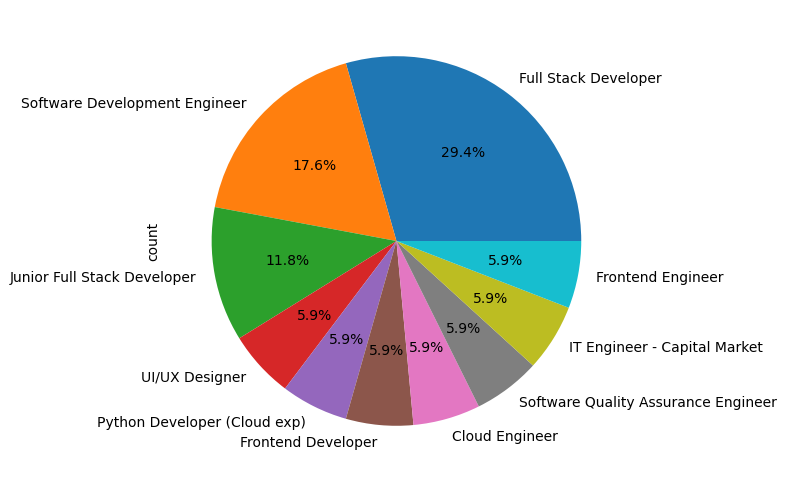

In [51]:
keywords = ['Web devlopment', 'frontend', 'backend devloper','full stack', 'IT Engineer','ui/ux ','software','cloud']

df['software'] = df['Job Title'].where(
    df['Job Title'].str.contains('|'.join(keywords), case=False, na=False),
    'no'
)
software_only=df[df['software']!='no']
print(software_only['software'].value_counts())
software_only['software'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)


core
Civil Engineer                 2
Site Engineer                  2
Solar Site Engineer            1
Senior Site Engineer           1
ASP.NET MVC Core Developers    1
Name: count, dtype: int64


<Axes: ylabel='count'>

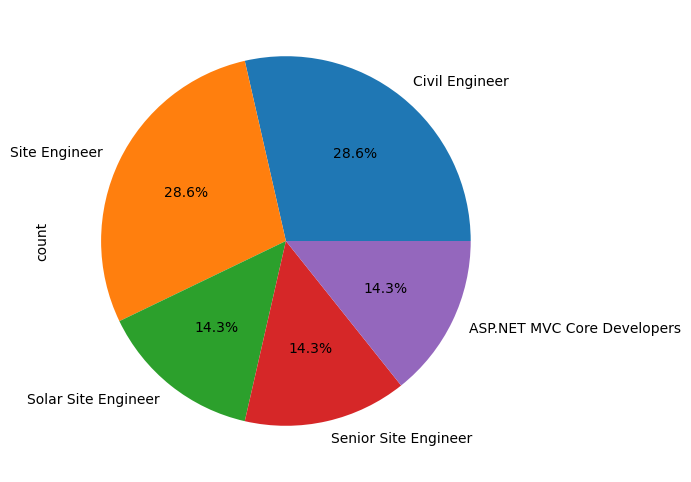

In [46]:
keywords = ['core','civil','site']

df['core'] = df['Job Title'].where(
    df['Job Title'].str.contains('|'.join(keywords), case=False, na=False),
    'no'
)
core_only=df[df['core']!='no']
print(core_only['core'].value_counts())
core_only['core'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)


)


AI
Data Analytics & AI Manager         1
AI/ML Development Technical Lead    1
ML Engineer                         1
AI Marketing Manager                1
Creative AI Designer                1
Senior AI/ML Developer              1
AI / MLOps Engineer                 1
Name: count, dtype: int64


<Axes: ylabel='count'>

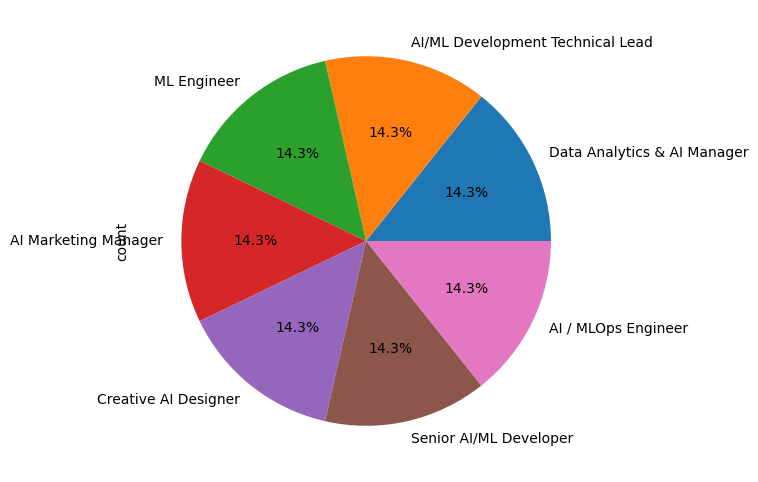

In [45]:
keywords = ['ai designer','ml','ai marketing','ai manager']

df['AI'] = df['Job Title'].where(
    df['Job Title'].str.contains('|'.join(keywords), case=False, na=False),
    'no'
)

 
ai_only = df[df['AI'] != 'no']
print(ai_only['AI'].value_counts())
ai_only['AI'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)


)

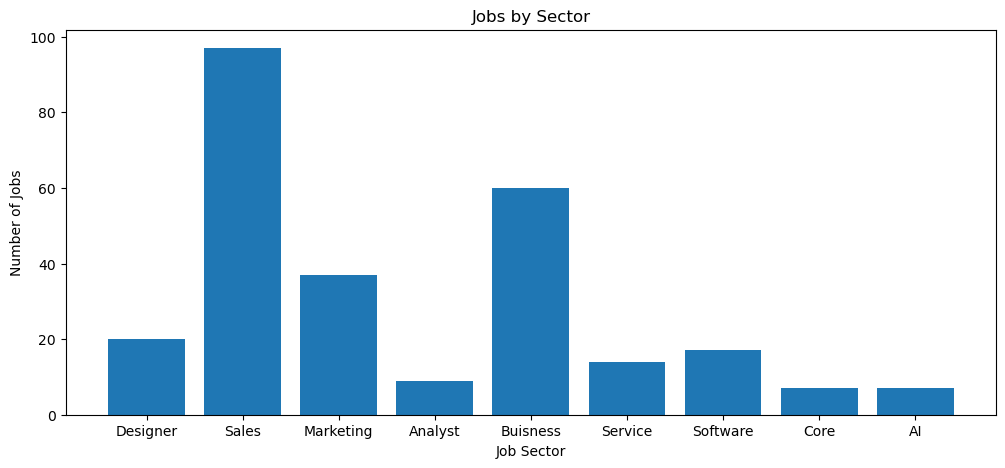

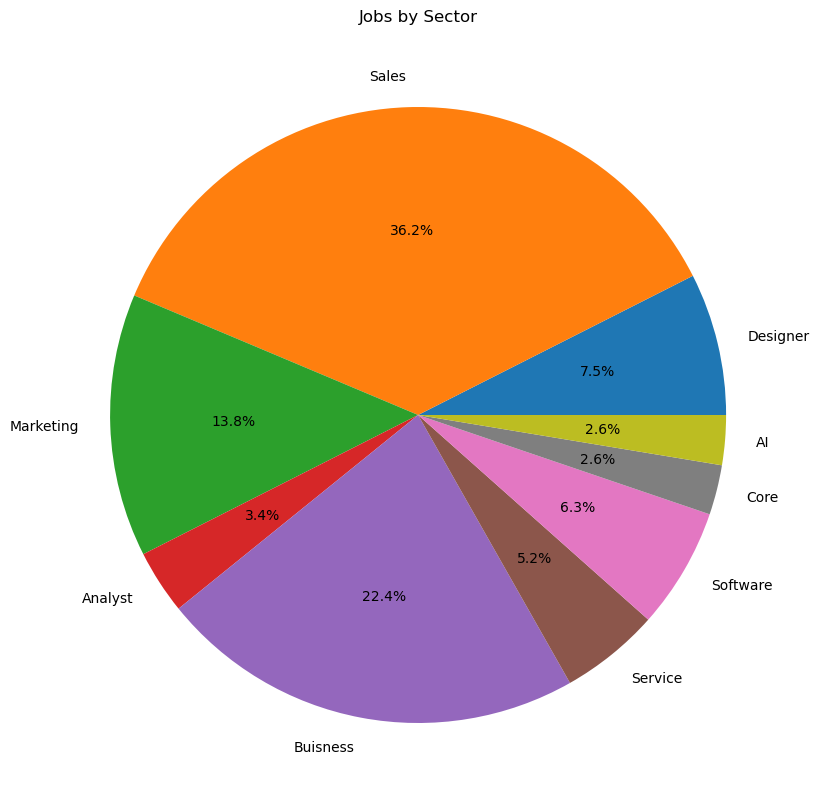

In [72]:
# overall comparsion
import matplotlib.pyplot as plt
Jobs=[designer_only['designer'].value_counts().sum(),
sales_only['sales'].value_counts().sum(),
marketing_only['marketing'].value_counts().sum(),
Analyst_only['analyst'].value_counts().sum(),
buisness_only['business'].value_counts().sum(),
service_only['service'].value_counts().sum(),
software_only['software'].value_counts().sum(),
core_only['core'].value_counts().sum(),
ai_only['AI'].value_counts().sum()
     ]
Jobs_role=['Designer','Sales','Marketing','Analyst','Buisness','Service','Software','Core','AI']
plt.figure(figsize=(12,5))
plt.title('Jobs by Sector')
plt.xlabel('Job Sector')
plt.ylabel('Number of Jobs')
plt.bar(Jobs_role,Jobs)
plt.show()
plt.figure(figsize=(10,10))

plt.pie(
    Jobs,
    labels=Jobs_role,    
    autopct='%1.1f%%'
)

plt.title('Jobs by Sector')
plt.show()


Location
Remote                         37
In Office | Noida              33
In Office | Bangalore Urban    33
In Office | Chennai            32
In Office | Hyderabad          30
In Office | Bengaluru          29
In Office | Mumbai             23
In Office | Delhi              17
Remote | Pan India             14
In Office | Pune               13
In Office | Kolkata            11
In Office | Gurgaon            11
In Office | Indore              9
In Office | Ahmedabad           9
In Office | New Delhi           7
In Office                       6
In Office | Jaipur              6
In Office | South Delhi         5
In Office | Lucknow             5
On Field | Pan India            5
In Office | Bhubaneswar         5
In Office | Ghaziabad           4
Name: count, dtype: int64


<Axes: ylabel='count'>

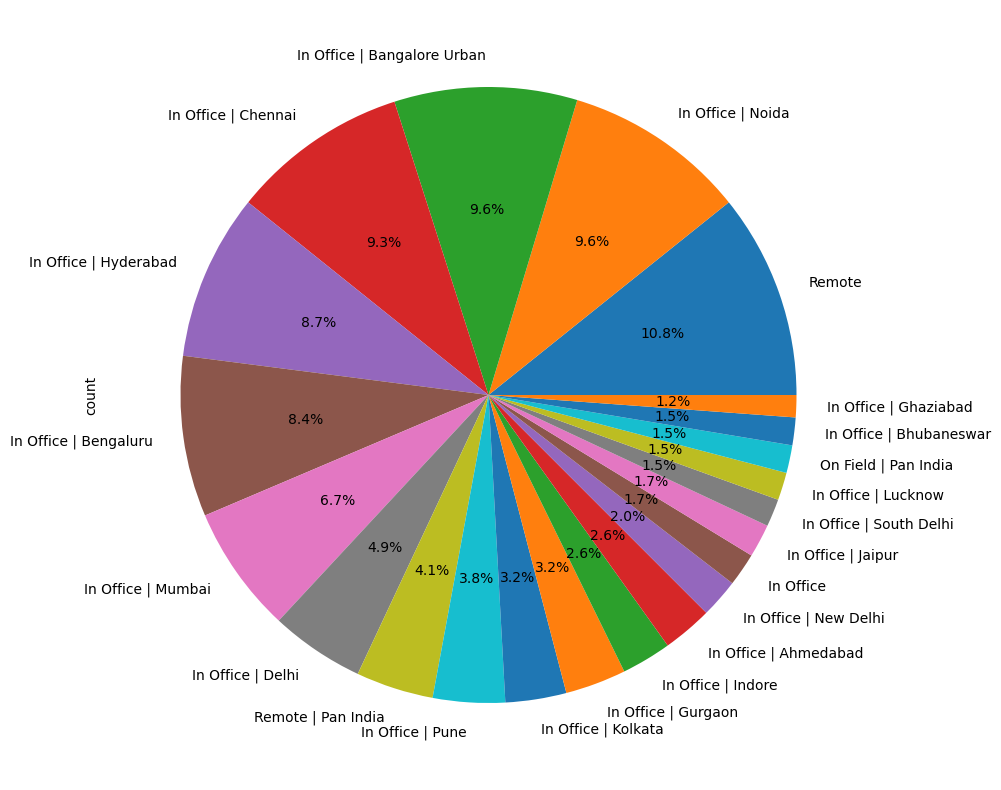

In [80]:
loc_counts = df['Location'].value_counts()

valid_locations = loc_counts[loc_counts > 3].index

Locations = df[df['Location'].isin(valid_locations)]
print(Locations['Location'].value_counts())
Locations['Location'].value_counts().plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%'
)


                                                

Remote
Remote                37
Remote | Pan India    14
Name: count, dtype: int64


<Axes: ylabel='count'>

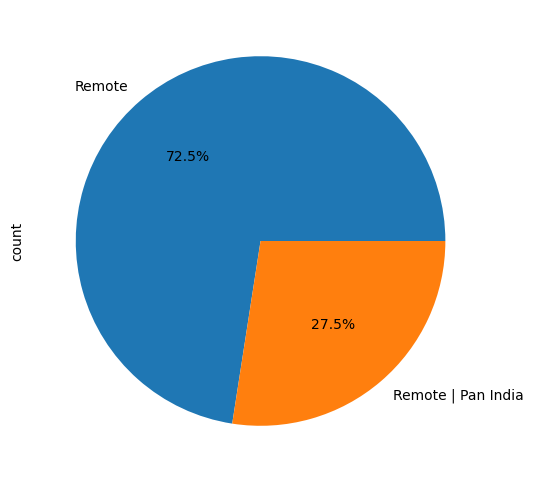

In [86]:
# Remotes vs office jobs
keywords = ['Remote']

df['Remote'] = df['Location'].where(
    df['Location'].str.contains('|'.join(keywords), case=False, na=False),
    'no'
)

 
remote_only = df[df['Remote'] != 'no']
print(remote_only['Remote'].value_counts())
remote_only['Remote'].value_counts().plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%'
)



In [106]:
import numpy as np
import re

def salary_to_monthly(s):
    if pd.isna(s):
        return np.nan
    
    s = str(s).lower().replace(',', '').strip()
    

    if 'lpa' in s:
        nums = re.findall(r'\d+\.?\d*', s)
        nums = [float(n) for n in nums]
        
        if len(nums) == 1:
            return nums[0] * 100000 / 12
        else:
            return np.mean(nums) * 100000 / 12
    
    
    if 'k' in s:
        nums = re.findall(r'\d+\.?\d*', s)
        nums = [float(n) for n in nums]
        
        if len(nums) == 1:
            return nums[0] * 1000
        else:
            return np.mean(nums) * 1000
    
    return np.nan

df['Salary_Monthly'] = df['Salary'].apply(salary_to_monthly)
print(df['Salary_Monthly'])




0       30000.000000
1       40833.333333
2      229166.666667
3       22500.000000
4                NaN
           ...      
495     31250.000000
496     36666.666667
497     27083.333333
498              NaN
499              NaN
Name: Salary_Monthly, Length: 500, dtype: float64


In [107]:
def get_sector(title):
    if pd.isna(title):
        return 'Other'
    
    title = title.lower()
    
    if any(x in title for x in ['designer','ui','ux','graphic']):
        return 'Design'
    
    elif any(x in title for x in ['data','analyst','scientist','ml','ai']):
        return 'Data and Ai'
    
    elif any(x in title for x in ['software','developer','engineer','backend','frontend']):
        return 'Tech'
    
    elif any(x in title for x in ['marketing','seo','sales']):
        return 'Marketing and Sales'
    
    else:
        return 'Other'

df['Job Sector'] = df['Job Title'].apply(get_sector)
print(df['Job Sector'])


0                   Design
1                     Tech
2              Data and Ai
3                    Other
4      Marketing and Sales
              ...         
495                 Design
496                  Other
497    Marketing and Sales
498    Marketing and Sales
499                  Other
Name: Job Sector, Length: 500, dtype: object


In [108]:
sector_salary = df.groupby('Job Sector')['Salary_Monthly'].mean().sort_values(ascending=False)

print(sector_salary)


Job Sector
Data and Ai            56958.333333
Tech                   35309.523810
Other                  32127.419355
Marketing and Sales    30598.352713
Design                 29226.785714
Name: Salary_Monthly, dtype: float64


Text(0.5, 1.0, 'Sector vs Avg Salary')

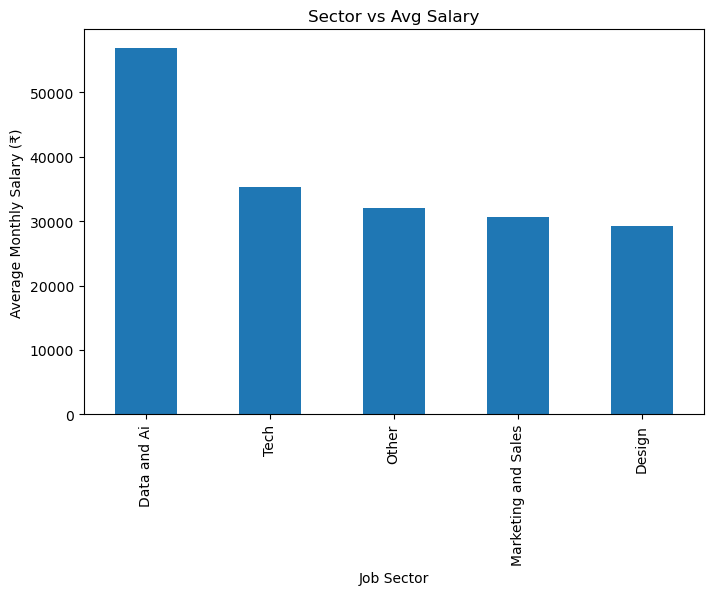

In [103]:
sector_salary.plot(
    kind='bar',
    figsize=(8,5)
)

plt.xlabel('Job Sector')
plt.ylabel('Average Monthly Salary (₹)')
plt.title('Sector vs Avg Salary')


In [113]:

loc_counts = df['Location'].value_counts()
valid_locations = loc_counts[loc_counts > 3].index

df_loc = df[df['Location'].isin(valid_locations)]
location_salary = (
    df_loc
    .groupby('Location')['Salary_Monthly']
    .mean()
    .sort_values(ascending=False)
)

print(location_salary)



Location
In Office | Mumbai             51964.285714
On Field | Pan India           45833.333333
Remote                         44975.000000
In Office | Gurgaon            44008.333333
In Office | Lucknow            41250.000000
In Office                      34375.000000
In Office | Hyderabad          34026.515152
Remote | Pan India             33750.000000
In Office | Noida              32094.696970
In Office | Kolkata            30976.190476
In Office | Bangalore Urban    30957.333333
In Office | Ahmedabad          30722.222222
In Office | Ghaziabad          30000.000000
In Office | Bhubaneswar        28500.000000
In Office | Chennai            28063.725490
In Office | Delhi              26750.000000
In Office | Bengaluru          26064.814815
In Office | Pune               25041.666667
In Office | New Delhi          23680.555556
In Office | South Delhi        23000.000000
In Office | Jaipur             22500.000000
In Office | Indore             21100.000000
Name: Salary_Monthly, d

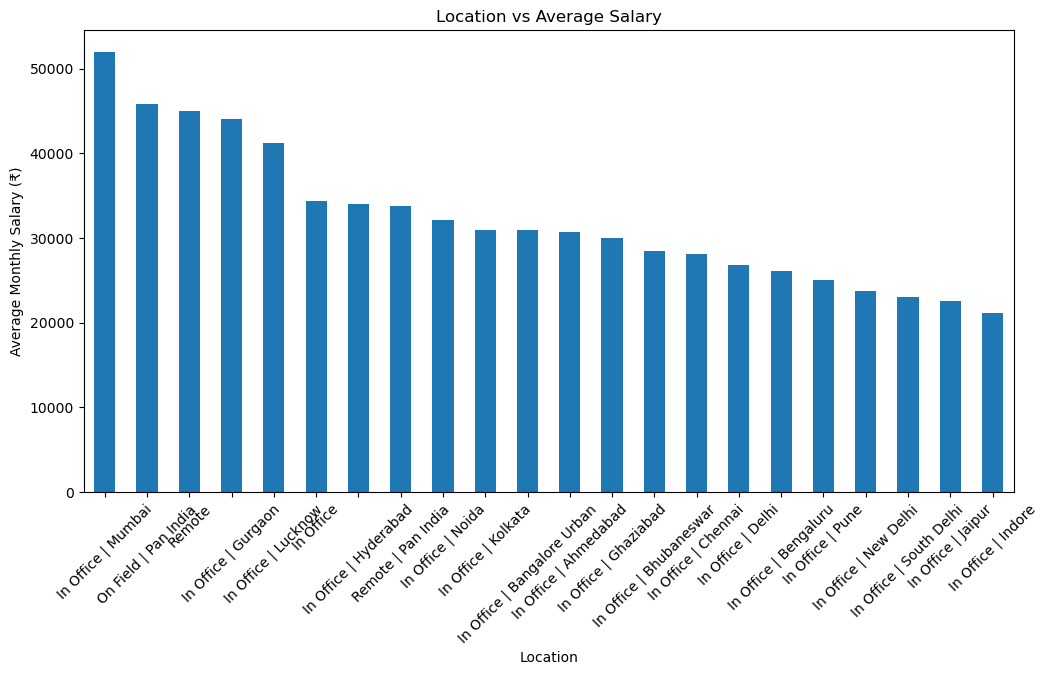

In [114]:

plt.figure(figsize=(12,6))

location_salary.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Average Monthly Salary (₹)')
plt.title('Location vs Average Salary')

plt.xticks(rotation=45)
plt.show()
